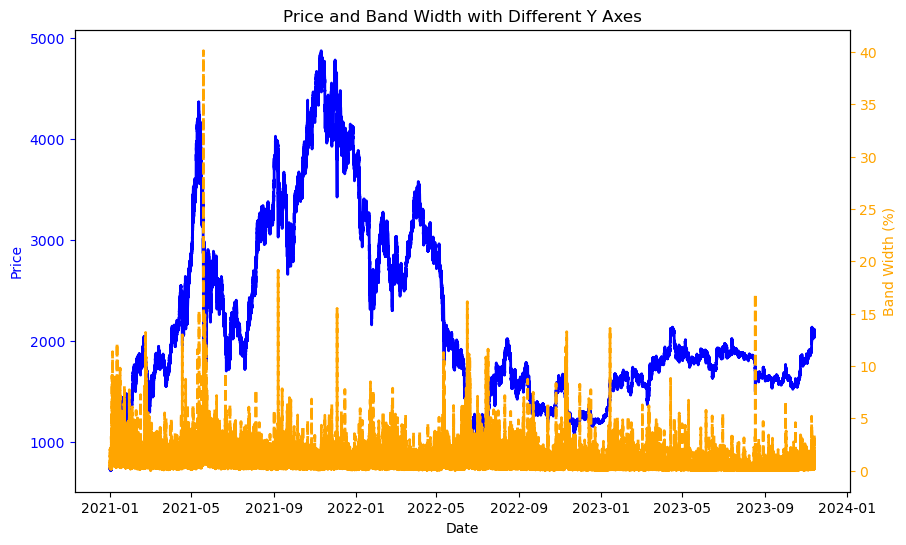

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 df 包含 'close' 欄位
# 如果還有其他欄位需要使用，請確保在這之前已經計算好

# 參數
window_size = 20
multiplier = 2
bigger_width = 6
smaller_width = 4
df = pd.read_hdf('/Users/johnsonhsiao/ETHUSDT_PERPETUAL.h5')

# 計算指標
df['ma'] = df['close'].rolling(window=window_size).mean()
df['uband'] = df['ma'] + multiplier * df['close'].rolling(window=window_size).std()
df['lband'] = df['ma'] - multiplier * df['close'].rolling(window=window_size).std()
df['width'] = (df['uband'] - df['lband']) / df['ma'] * 100

# 繪圖
fig, ax1 = plt.subplots(figsize=(10, 6))

# 在左側 y 軸繪製價格
ax1.plot(df.index, df['close'], label='Price', linewidth=2, color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params('y', colors='blue')

# 在右側 y 軸繪製帶寬
ax2 = ax1.twinx()
ax2.plot(df.index, df['width'], label='Band Width', linestyle='--', linewidth=2, color='orange')
ax2.set_ylabel('Band Width (%)', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Price and Band Width with Different Y Axes')
plt.show()
